# **Project Phase 4**

- Student name: GROUP 5
- Student pace: Part Time
- Scheduled project review date/time: 27th August 2023
- Instructor name: William Okomba & Noah Kandie

# **Executive Summary**
In a rapidly evolving digital landscape, customer expectations for personalized interactions have surged.In response to the challenge of assisting our customers in efficiently navigating our diverse product catalog, we are embarking on a transformative journey to implement a state-of-the-art recommendation system. This visionary initiative aims to provide tailored product suggestions that resonate with individual preferences and interests. The projects entails;
**Data Analysis** -**Explorative Data Analysis (EDA)**: Our journey commences with Exploratory Data Analysis (EDA), a crucial step in deciphering user behaviors. Through Univariate EDA, we meticulously dissect data, uncovering hidden patterns and trends that will underpin our personalized recommendation engine.
**Algorithm Development** Our team of skilled data scientists crafts advanced algorithms, including collaborative filtering and matrix factorization, to generate accurate and relevant suggestions.

**Modelling**
 We deploy a combination of models to ensure the highest quality of personalized suggestions for users. Here's an overview of the models utilized.

1.**Baseline Model: K-Nearest Neighbors (KNN)**
 Our modeling journey starts with a strong foundation—the K-Nearest Neighbors (KNN) baseline model. This model forms the bedrock of our recommendations by identifying similarities between users or items.

2.**KNNWithMeans**
Building on the KNN baseline, we introduce KNNWithMeans, a variant that factors in user and item means. This approach compensates for potential rating biases, ensuring more balanced recommendations.

3.**KNNBasic**
KNNBasic is a simplified yet effective version of the KNN algorithm. It prioritizes simplicity and computational efficiency, making it an optimal choice for scenarios where rapid recommendations are essential.

4.**Singular Value Decomposition (SVD)**
One of the pillars of our modeling arsenal is Singular Value Decomposition (SVD). This powerful technique decomposes the user-item interaction matrix into latent factors.

**Model Training** Rigorous training and fine-tuning ensure that our Recommender System evolves, adapting to changing user behaviors and preferences.
Performance Evaluation: Through thorough testing and validation, we ensure that our system consistently delivers high-quality recommendations.

**Hybrid Approach** We synergize multiple recommendation strategies, combining content-based and collaborative filtering methods to provide comprehensive suggestions.

We deployed the model using the validation dataset and obtained an RMSE of 1.16.



# **Business Understanding**

Our customers often face difficulty in navigating our extensive product catalog to find items that match their preferences.
To overcome this challenge, we aim to implement a recommendation system that provides tailored product suggestions that align with individual preferences
and interests.
The goal is to increase user engagement, improve conversion rates, boost customer satisfaction and  drive revenue growth and bolster our market position.

# **Project Objectives**

- To increase Engagement - by suggesting products that resonate with customers' past behaviors, such as browsing history, purchases, and interactions.

- To Enhance Conversion Rates - by delivering recommendations that are more likely to lead to purchases, thereby driving revenue growth.

- To enhance Customer Satisfaction - by reducing the time and effort required for customers to find products of interest.

- To differentiate our platform by providing an innovative and user-centric feature.

In [1]:

pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811605 sha256=e292518809e18cc31b122340754d7e227e84860ffe848d0346d436a089829691
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## **Diving in**...



In [2]:
# Importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from surprise import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')




### Loading and merging the Datasets




In [3]:
#Loading the Datasets
ratings= pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links =pd.read_csv('links.csv')

#Merging the data sets into one
merged_df = pd.merge(ratings, movies, on = 'movieId', how = 'left')
merged_df = pd.merge(merged_df,tags, on = 'movieId', how = 'left', suffixes = ('rater', 'tag'))
merged_df = pd.merge(merged_df,links, on = 'movieId', how = 'left')

 # **Data Understanding**

Exploring the data to get a glimpse of:

- Shape of the data
- The column names
- The data types
- Statistical summary of the data
- Missing values
- The duplicates

In [4]:
# Rows and columns in our dataspet
print(f'Shape for the merged dataset, {merged_df.shape}')


Shape for the merged dataset, (285762, 11)


In [5]:
# Data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285762 entries, 0 to 285761
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userIdrater     285762 non-null  int64  
 1   movieId         285762 non-null  int64  
 2   rating          285762 non-null  float64
 3   timestamprater  285762 non-null  int64  
 4   title           285762 non-null  object 
 5   genres          285762 non-null  object 
 6   userIdtag       233213 non-null  float64
 7   tag             233213 non-null  object 
 8   timestamptag    233213 non-null  float64
 9   imdbId          285762 non-null  int64  
 10  tmdbId          285749 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 26.2+ MB


In [6]:
# Columns overview.
merged_df.columns

Index(['userIdrater', 'movieId', 'rating', 'timestamprater', 'title', 'genres',
       'userIdtag', 'tag', 'timestamptag', 'imdbId', 'tmdbId'],
      dtype='object')

In [7]:
# Null values Check
merged_df.isna().sum()

userIdrater           0
movieId               0
rating                0
timestamprater        0
title                 0
genres                0
userIdtag         52549
tag               52549
timestamptag      52549
imdbId                0
tmdbId               13
dtype: int64

In [8]:
#Dealing with null values.
merged = merged_df.dropna()
# We shall use merged for data visualization


### Rationale for droping null values
We dropped the null values since we already have more than enough data for analysis.  Furthermore, dropping the null values  would not have a negative  impact on our modelling process.

In [9]:
#New shape after dropping the null values
merged.shape

(233213, 11)

In [10]:
#Duplicate check
merged.duplicated().sum()

0

In [11]:
# Summary statistics for rating
merged['rating'].describe()

count    233213.000000
mean          3.966535
std           0.968637
min           0.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

### Data description report
After merging the 4 datasets, the data had  285,672 rows and 11 columns.The rows reduced to 233,213 after dropping rows that contaiend null values.
The dataset consists of three main data types; float, integer, and object. The datatypses are well suited for the data they represent.

There are no duplicated rows in this dataset.

We did a ststistical summary on ratings as it is the only feature that would give meanigful insights. These are our conclusin based on the statistical summary...
That the mean rating for the movies is 3.97
- The spread around the mean rating for the movies is  0.96.
- The least rating that a movie  was given by a user is 0.5
- The highest rating given for moview was 5.
- 25% of the ratings were below 3.5
- Half of the ratings were below 4.

Summary of Features in the Dataset

- UserIdrater:Represents the user ID of the rater.

- MovieId:Represents the ID of the movie being rated.

- Rating:Represents the rating given by the user to the movie.

- Timestamprater:Represents the timestamp of when the rating was given.

- Title:Represents the title of the movie.

- Genres: Represents the genres associated with the movie.

- UserIdtag: Represents the user ID of the tagger.

- Tag:Represents the tag associated with the movie.
- Timestamptag:Represents the timestamp of when the tag was assigned


# **Data Preparation**

### Picking the relevant columns for Modelling

In [12]:
# Picking the relevant columns  and storing them in pdframe 'data'
data = merged_df[['userIdrater', 'movieId', 'rating']]
data.head(3)


,userIdrater,movieId,rating
0,1,1,4.0
1,1,1,4.0
2,1,1,4.0


### Grouping by user_items pairs for uninque Movies

 For us to conduct modelling the right way we need  remove dublicates  in our data by finding the average rating for movies rated multiple times by the same user.  We shall achieve using the groupby function that averages the rating of each unique movie rated by the same user...

In [13]:
# Group by user-item pairs and calculate mean rating
data = data.groupby(['userIdrater', 'movieId'], as_index=False)['rating'].mean()

# Print the grouped and averaged data
data.head(3)
data.shape

(100836, 3)

### Splitting the Data into two
We split the data  into two. The modelling data and the validataion data. We shall use 80% of the data to fit and train our model and we shall hold out  20% of the data for validaiton  and deployment

In [14]:
#importing the relevant train_test_split from skleran
from sklearn.model_selection import train_test_split
# Splitting the dataset into two.
modelling_df, validation = train_test_split(data, test_size = 0.2, random_state =42 )


# **Explorative Data Analysis [EDA]**

### Univariate EDA

#### Most Popular Genres

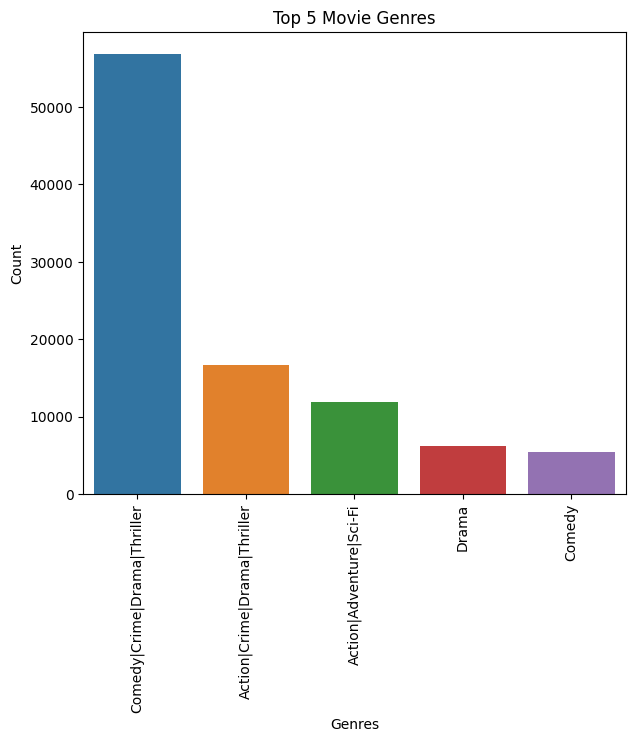

In [15]:
#Visulaizing the most popular Genres
merged['genres'].value_counts()
top_5_genres = merged['genres'].value_counts().head(5)

# Create a bar plot using Seaborn
plt.figure(figsize=(7,6))
sns.barplot(x= top_5_genres.index, y=top_5_genres.values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 5 Movie Genres')
plt.show()

#### Most popular movies

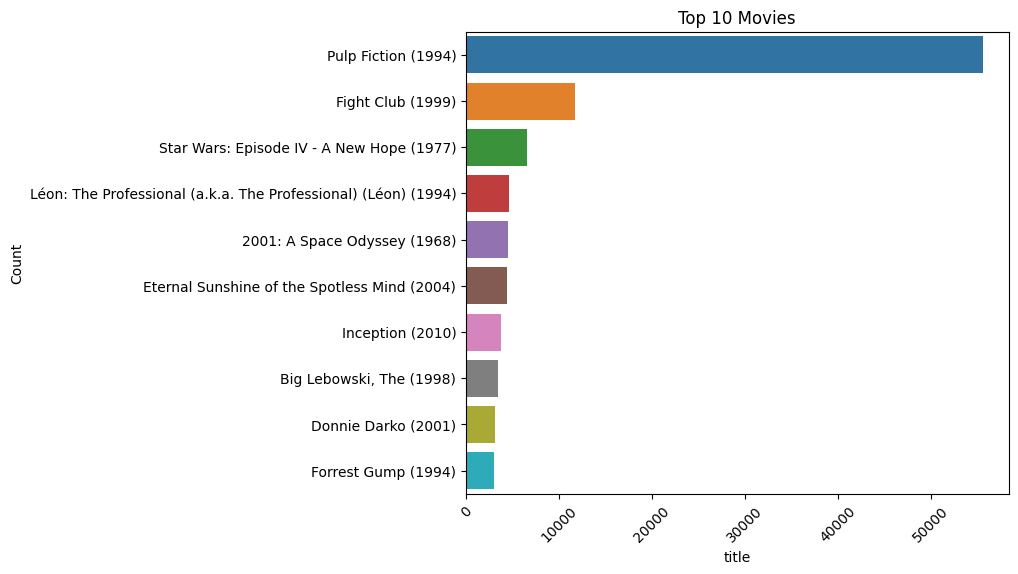

In [16]:
#visulaizing the most popular movies
merged['title'].value_counts()
top_10_movies = merged['title'].value_counts().head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(7,6))
sns.barplot(x= top_10_movies.values, y=top_10_movies.index,orient ='h')
plt.xticks(rotation=45)
plt.xlabel('title')
plt.ylabel('Count')
plt.title('Top 10 Movies')
plt.show()

#### Most Popular tags

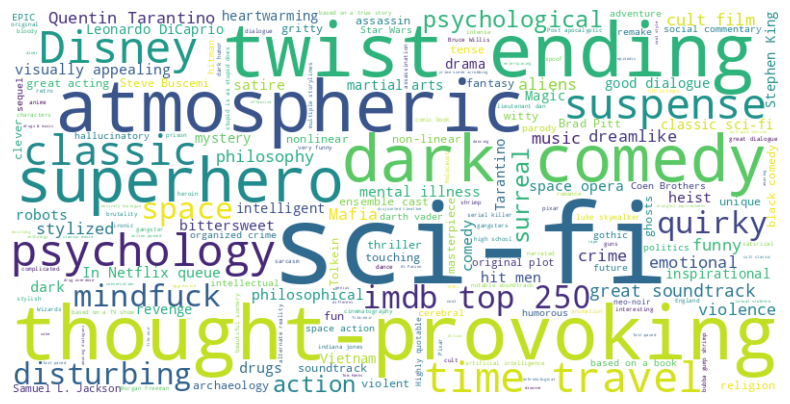

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Count the frequency of each tag
tag_counts = merged['tag'].value_counts()

# Generate a dictionary of tag frequencies
tag_frequencies = {tag: count for tag, count in tag_counts.items()}

# Create a WordCloud instance
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

plt.show()

:The most common tags for the movies in our data set are sci-fi, twist_ending, thought provoking, atmosepheric and comedy while the leasr common tags in our movie dataset include highschool, based on a true story and adventure

#### Distribuiton of Ratings

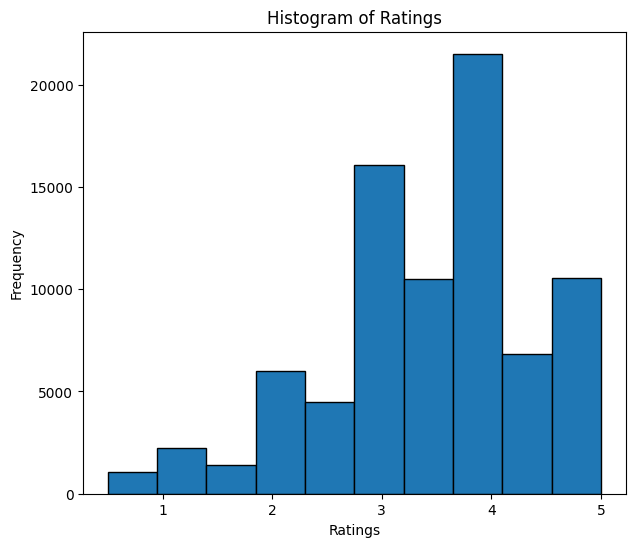

In [18]:
#Visualizing the Distribuiton of ratings
plt.figure(figsize=(7,6))
plt.hist(modelling_df['rating'], bins=10, edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

From the histogram above,  the most frequent rate given for the 1554 movies in oir dataset is 4 followed by 3 and then 5. Less people gave low ratings to movies

#### Number of unique items and Unique User Ids

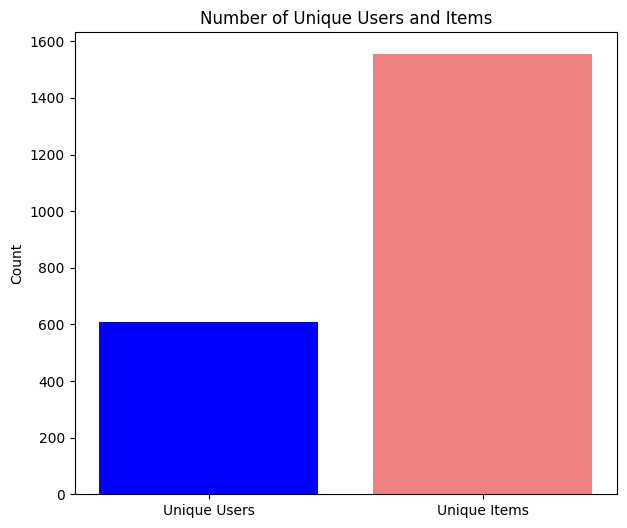

In [19]:
# Calculate the number of unique users and items
num_users = merged['userIdrater'].nunique()
num_items = merged['movieId'].nunique()
# Create a bar plot for unique users and items
plt.figure(figsize=(7, 6))
plt.bar(['Unique Users', 'Unique Items'], [num_users, num_items], color=['blue', 'lightcoral'])
plt.ylabel('Count')
plt.title('Number of Unique Users and Items')
plt.show()

 In our dataset there are 610 unique users and 1554 unique  movies.

### User Interaction

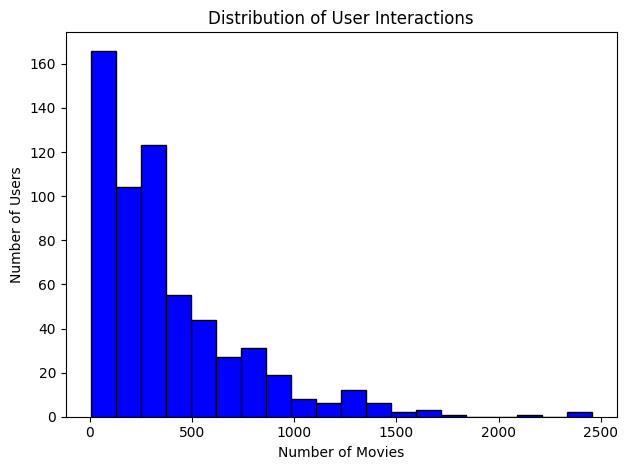

In [20]:
# Create a histogram for user interactions
user_interactions = merged.groupby('userIdrater')['movieId'].count().reset_index()
# Rename the count column
user_interactions.rename(columns={'movieId': 'num_interactions'}, inplace=True)

plt.hist(user_interactions['num_interactions'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Number of Movies')
plt.ylabel('Number of Users')
plt.title('Distribution of User Interactions')
plt.tight_layout()
plt.show()


### Visualizing Data Sparsity

In [21]:

# Calculate the total possible ratings and actual ratings
total_possible_ratings = num_users * num_items
actual_ratings = merged.shape[0]

# Calculate missing ratings and sparsity
missing_ratings = total_possible_ratings - actual_ratings
sparsity = (missing_ratings / total_possible_ratings) * 100

print(f"Sparsity of the data: {sparsity:.2f}%")

Sparsity of the data: 75.40%


The below sparsity  heatmap displays a binary representation of the ratings: blue squares represent rated items, while white squares represent missing ratings. This visualization helps you get an immediate sense of the sparsity of your data.

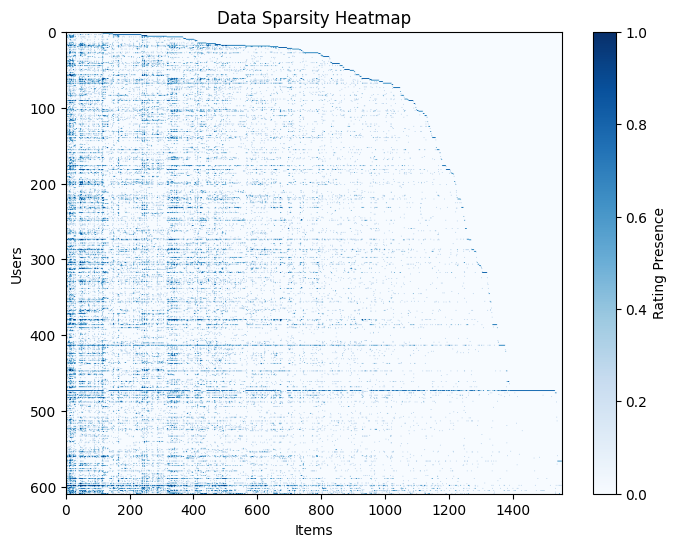

In [22]:

# Create a mapping from original IDs to consecutive indices
user_id_to_index = {user_id: index for index, user_id in enumerate(merged['userIdrater'].unique())}
movie_id_to_index = {movie_id: index for index, movie_id in enumerate(merged['movieId'].unique())}

# Determine the number of users and items
num_users = len(user_id_to_index)
num_items = len(movie_id_to_index)

# Create a matrix to represent the ratings
rating_matrix = np.zeros((num_users, num_items))

# Fill the rating matrix with actual ratings
for index, row in merged.iterrows():
    user_index = user_id_to_index[row['userIdrater']]
    item_index = movie_id_to_index[row['movieId']]
    rating = row['rating']
    rating_matrix[user_index, item_index] = rating

# Create a binary matrix to represent the sparsity pattern
binary_matrix = np.where(rating_matrix > 0, 1, 0)

# Create the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(binary_matrix, cmap="Blues", aspect="auto")
plt.xlabel("Items")
plt.ylabel("Users")
plt.title("Data Sparsity Heatmap")
plt.colorbar(label="Rating Presence")
plt.show()


In [23]:
data.columns

Index(['userIdrater', 'movieId', 'rating'], dtype='object')

Many users interacted with less number of movies. Les users interacted with many movies

 #### Top  15 Movies with the highest aveage ratings

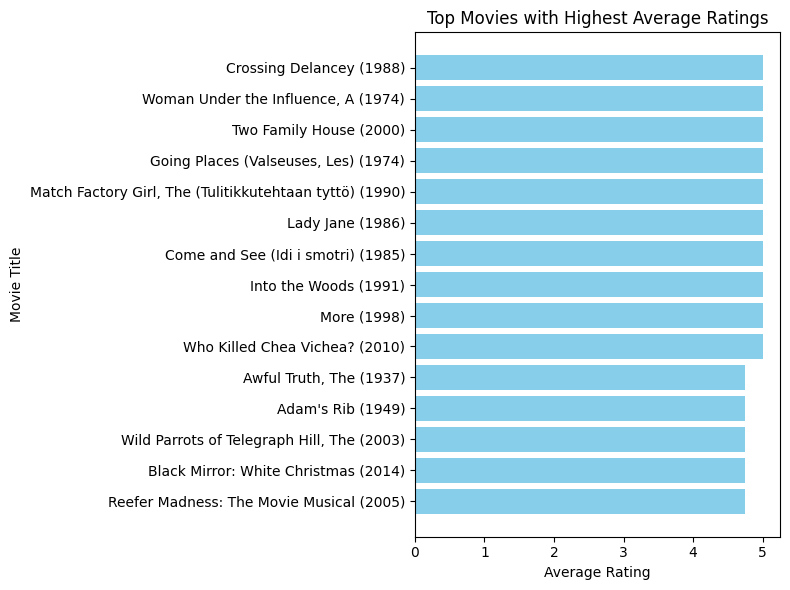

In [24]:

# Calculate the average rating for each movie
average_ratings = merged.groupby(['movieId', 'title'])['rating'].mean().reset_index()

# Sort the movies by average rating in descending order
sorted_movies = average_ratings.sort_values(by='rating', ascending=False)

# Select the top movies with highest average ratings
top_movies = sorted_movies.head(15)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(top_movies['title'], top_movies['rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top Movies with Highest Average Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.tight_layout()
plt.show()


#### Bottom 10 Movies with the least ratings

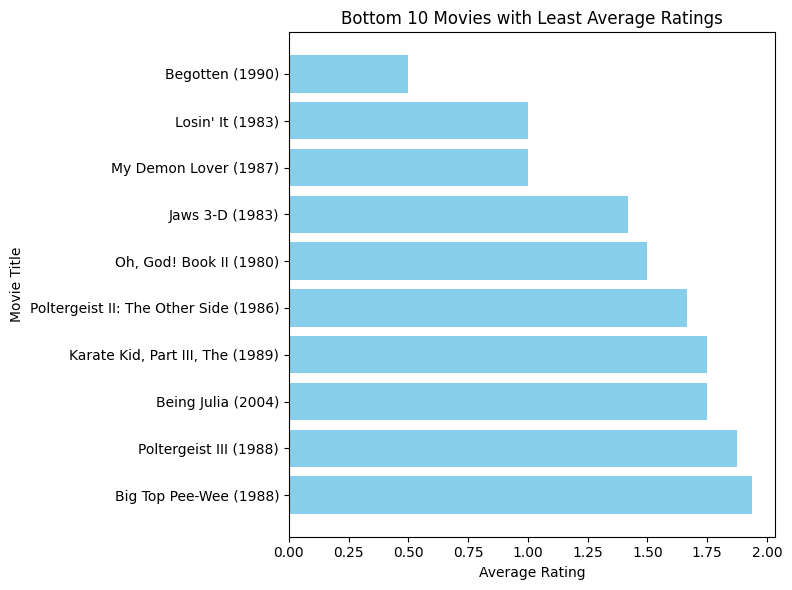

In [25]:
# Sort in  ascending oder
sorted_movies = average_ratings.sort_values(by='rating', ascending=True)

# Select the top movies with highest average ratings
Bottom_movies = sorted_movies.head(10)

# Create a bar plot
plt.figure(figsize=(8,6))
plt.barh(Bottom_movies['title'], Bottom_movies['rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Bottom 10 Movies with Least Average Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.tight_layout()
plt.show()

### Correlation HeatMap of Ratings of MovieID

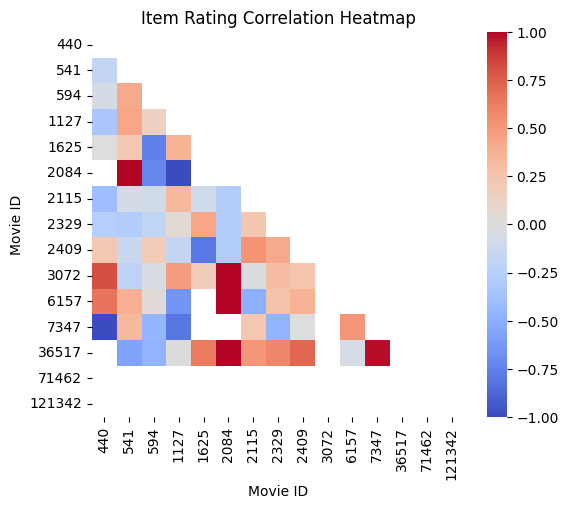

In [26]:

# Select a sample of 20 unique movies
sample_movies = modelling_df['movieId'].unique()[:15]

# Filter the data to include only interactions with the sample movies
sample_data = modelling_df[modelling_df['movieId'].isin(sample_movies)]

# Calculate the average rating for each user-movie combination in the sample
average_ratings = sample_data.groupby(['userIdrater', 'movieId'])['rating'].mean().reset_index()

# Pivot the DataFrame to create the user-item interaction matrix
interaction_matrix = average_ratings.pivot(index='userIdrater', columns='movieId', values='rating')

# Calculate the correlation matrix
correlation_matrix = interaction_matrix.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with the masked upper triangle
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, mask=mask)
plt.title('Item Rating Correlation Heatmap')
plt.xlabel('Movie ID')
plt.ylabel('Movie ID')
plt.show()


#**Modelling**

Picking the Relevant columns for Modelling





In [27]:
data = data[['userIdrater', 'movieId', 'rating']]
data.head(3)

,userIdrater,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0


#### Instansiate reader and data

In [28]:
# Instantiating  reader and data
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(data, reader)

#### Spliting the data into train and test

In [29]:
# Split data using  Surprise
from surprise.model_selection import cross_validate, train_test_split
trainset, testset = train_test_split(data, test_size=.2,random_state =42)



```
# This is formatted as code
```

## Baseline Model
Our baseline model is the KNN basleine model

In [30]:
#Instantiating the baseline model
baseline = KNNBaseline(random_state=42)

In [31]:
# Fitting the baseline model on the trainset
baseline.fit(trainset)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


### Model Evaluation: Evaluator function


This projecet aims at optimising the loss function by minimising the root mean squared error and the mean absolute error. The code that follows builds a function to calculate theevaliation metrics

In [32]:
def evaluate_model (model, trainset, testset):
# Fit the model
  model.fit
# predict on test
  modelpreds = model.test(testset)
# Calculate RMSE and MAE
  RMSE = accuracy.rmse(modelpreds)
  MAE =accuracy.mae(modelpreds)


In [33]:
# Evaluating the baseline model using the Evaluator function
evaluate_model (baseline, trainset, testset)

RMSE: 0.8827
MAE:  0.6736


 The baseline has an RMSE 0.586 implying that the predicted ratings were off from the actual ratings by 0.586. Our aim is to reduce the RMSE.  In the next cell we shall explore other models and hypertune them to obtain  the optimal loss.

### Evaluate other Models KNNWithMeans, KNNBasic, SVD

In [34]:
models = {"KNNWithMeans": KNNWithMeans(sim_options={'user_based': False}, random_state =42),
          "KNNBasic": KNNBasic(sim_options={'user_based': False}, random_state =42),
          "KNNBaseline":KNNBaseline(random_state =42),
          "SVD": SVD(),}
for model_name, model in models.items():
  #fit the model on the  trainset
  model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [35]:
def metric_calculator (modelpreds):
  """
  Calculating RMSE and MAE
  """
  RMSE = accuracy.rmse(modelpreds)
  MAE =accuracy.mae(modelpreds)
  return{"RMSE":RMSE, "MAE": MAE}
metrics ={}
for model_name, model in models.items():
  modelpreds = model.test(testset)
  # Matrix calculator
  metrics_test = metric_calculator(modelpreds)
  metrics[(model_name,'Test')] = metrics_test
metrics_df = pd.DataFrame(metrics).T
metrics_df




RMSE: 0.9002
MAE:  0.6865
RMSE: 0.9123
MAE:  0.7010
RMSE: 0.8827
MAE:  0.6736
RMSE: 0.8805
MAE:  0.6761


,,RMSE,MAE
KNNWithMeans,Test,0.900240,0.686501
KNNBasic,Test,0.912338,0.701009
KNNBaseline,Test,0.882673,0.673638
SVD,Test,0.880457,0.676050


From the vanilla models above.  It is clear that the item based collaborative filtering i.e KNNWithMeans, and KNNBasic performed poorly as compared to the  Singular Value Decomposition.  While the prediction rating from actual ratings were off by 0.900 in KNNwm, it was 0.91 in KNNBasic and 0.87in SVD. It is also worth noting that only SVD performed better than the KNNBasline model.
However hypertuning each of the model could lead to different outcomes as we will try to ascertain....

### **Hyperparameter Tuning Using GridSearchCV**





#### Tuning for KNN Baseline

In [36]:
# Putting the relevant parameters for gridsearh
knnbaseline_grid = {
    'k': [10, 20, 30],   # Number of neighbors
    'sim_options': {
        'name': ['cosine', 'pearson'],  # Similarity measures
        'user_based': [False],  # Item-based collaborative filtering
    },
}


In [37]:
from surprise.model_selection import GridSearchCV
from surprise import KNNBaseline
# Findinfg the best parameters for KNNBaseline
models = {
    "KNNBaseline": KNNBaseline,}

# Loop through models and perform grid search or fitting
for model_name, model_class in models.items():
    if model_name == "KNNBaseline":
        grid_search = GridSearchCV(model_class, knnbaseline_grid,
                                   measures=['rmse', 'mae'], cv=5, n_jobs=-1)
        grid_search.fit(data)
        best_params = grid_search.best_params['rmse']
        print(f"Best Hyperparameters for {model_name}: {best_params}")
        model = grid_search.best_estimator['rmse']
    else:
        model = model_class()
        model.fit(trainset)


Best Hyperparameters for KNNBaseline: {'k': 30, 'sim_options': {'name': 'pearson', 'user_based': False}}


#### Evaluating Tuned KNNBasleine : **MODEL 1**



In [38]:
#Instantiate KNNBaseline with the best hyperparameters
best_k = 30
best_sim_options = {'name': 'pearson', 'user_based': False}
knnbaseline_tuned = KNNBaseline(k=best_k, sim_options=best_sim_options,random_state =42)

# Fit the model on the trainset
knnbaseline_tuned.fit(trainset)
# Predict on test
knnbaseline_tuned.test(testset)
# Evaluating Model
print('.......................................................')
print('Metrics for Tuned KNNBaseline')
evaluate_model (knnbaseline_tuned, trainset, testset)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
.......................................................
Metrics for Tuned KNNBaseline
RMSE: 0.8889
MAE:  0.6830


### Tuning for KNNBasic

In [39]:
knnbasic_grid = {
    'k': [10, 20, 30],  # Number of neighbors
    'sim_options': {
        'name': ['cosine', 'pearson'],  # Similarity measures
        'user_based': [False],  # Item-based collaborative filtering
    },
}

In [40]:
models = {
    "KNNBasic": KNNBasic,
    "KNNBaseline": KNNBaseline,
    "KNNWithMeans":KNNWithMeans,
    "SVD": SVD,
}

# Loop through models and perform grid search or fitting
for model_name, model_class in models.items():
    if model_name == "KNNBasic":
        grid_search = GridSearchCV(model_class, knnbasic_grid,
                                   measures=['rmse', 'mae'], cv=5, n_jobs=-1)
        grid_search.fit(data)
        best_params = grid_search.best_params['rmse']
        print(f"Best Hyperparameters for {model_name}: {best_params}")
        model = grid_search.best_estimator['rmse']
    else:
        model = model_class()
        model.fit(trainset)


Best Hyperparameters for KNNBasic: {'k': 30, 'sim_options': {'name': 'pearson', 'user_based': False}}
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


#### Evaluating Tuned KNNBasic: **MODEL 2**

In [41]:
#Instantiate KNNBaseline with the best hyperparameters
best_k = 30
best_sim_options = {'name': 'cosine', 'user_based': False}
knnbasic_tuned = KNNBasic(k=best_k, sim_options=best_sim_options,random_state =42)

# Fit the model on the trainset
knnbasic_tuned.fit(trainset)
# Predict on test
knnbasic_tuned.test(testset)
# Evaluating Model
print('........................................')
print('Metrics for Tuned KNNBasic')
evaluate_model (knnbasic_tuned, trainset, testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
........................................
Metrics for Tuned KNNBasic
RMSE: 0.9851
MAE:  0.7665


### Tuning KNNWithMeans

In [42]:
knnwm_grid = {
    'k': [10, 20, 30],  # Number of neighbors
    'sim_options': {
        'name': ['cosine', 'pearson'],  # Similarity measures
        'user_based': [False],  # Item-based collaborative filtering
    },
}

In [43]:
# Loop through models and perform grid search or fitting
for model_name, model_class in models.items():
    if model_name == "KNNWithMeans":
        grid_search = GridSearchCV(model_class, knnwm_grid,
                                   measures=['rmse', 'mae'], cv=5, n_jobs=-1)
        grid_search.fit(data)
        best_params = grid_search.best_params['rmse']
        print(f"Best Hyperparameters for {model_name}: {best_params}")
        model = grid_search.best_estimator['rmse']
    else:
        model = model_class()
        model.fit(trainset)


Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Best Hyperparameters for KNNWithMeans: {'k': 30, 'sim_options': {'name': 'pearson', 'user_based': False}}


#### Evaluating  Tuned KNN with Means : **MODEL 3**

In [44]:
#Instantiate KNNBaseline with the best hyperparameters
best_k = 30
best_sim_options = {'name': 'pearson', 'user_based': False}
knnwm_tuned = KNNWithMeans(k=best_k, sim_options=best_sim_options)

# Fit the model on the trainset
knnwm_tuned.fit(trainset)
# Predict on test
knnwm_tuned.test(testset)
# Evaluating Model
print('........................................')
print('Metrics for Tuned KNN With Means')
evaluate_model (knnwm_tuned, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
........................................
Metrics for Tuned KNN With Means
RMSE: 0.9149
MAE:  0.6934


### TUNING SVD

In [45]:
svd_grid = {
    'n_factors': [50, 100, 200],  # Number of latent factors
    'n_epochs': [10, 20, 30],  # Number of epochs
    'lr_all': [0.002, 0.005, 0.01],  # Learning rate for all parameters
    'reg_all': [0.02, 0.1, 0.5],  # Regularization term for all parameters
}

In [46]:
# Loop through models and perform grid search or fitting
for model_name, model_class in models.items():
    if model_name == "SVD":
        grid_search = GridSearchCV(model_class, svd_grid,
                                   measures=['rmse', 'mae'], cv=5, n_jobs=-1)
        grid_search.fit(data)
        best_params = grid_search.best_params['rmse']
        print(f"Best Hyperparameters for {model_name}: {best_params}")
        model = grid_search.best_estimator['rmse']
    else:
        model = model_class()
        model.fit(trainset)


Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Best Hyperparameters for SVD: {'n_factors': 200, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}


#### Evaluating tuned SVD : **MODEL 4**

In [47]:
#Instantiate KNNBaseline with the best hyperparameters
from surprise import SVD

# Best hyperparameters
best_n_factors = 200
best_n_epochs = 30
best_lr_all = 0.01
best_reg_all = 0.1

# Instantiate SVD with the best hyperparameters
best_svd = SVD(n_factors=best_n_factors, n_epochs = best_n_epochs, lr_all = best_lr_all, reg_all = best_reg_all,random_state =42)

# Fit the model on the trainset
best_svd.fit(trainset)
# Predict on test
best_svd.test(testset)
# Evaluating Model
print('........................................')
print('Metrics for Tuned SVD')
evaluate_model (best_svd, trainset, testset)


........................................
Metrics for Tuned SVD
RMSE: 0.8598
MAE:  0.6596


#### Fittting and Evaluating Truncated SVD : MODEL 5

---



In [48]:
#Create movie profiles
movies_genres = movies['genres'].str.get_dummies(sep='|')
tags_grouped = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()
tags_dummies = tags_grouped['tag'].str.replace(' ', '|').str.get_dummies(sep='|')
movie_profiles = movies.merge(movies_genres, left_on='movieId', right_index=True)
movie_profiles = movie_profiles.merge(tags_dummies, left_on='movieId', right_index=True, how='left').fillna(0)
movie_profiles = movie_profiles.drop(columns=['title', 'genres'])

# Create user profiles based on their ratings and the movie profiles
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
aligned_movie_profiles = movie_profiles.set_index('movieId').reindex(user_item_matrix.columns).fillna(0)
user_profiles = user_item_matrix.fillna(0).dot(aligned_movie_profiles)
user_norms = np.linalg.norm(user_profiles, axis=1)
user_profiles = user_profiles.divide(user_norms, axis=0)

# Check the shapes of user_profiles and movie_profiles_matrix
shape_user_profiles = user_profiles.shape
shape_movie_profiles = movie_profiles.set_index('movieId').shape

shape_user_profiles, shape_movie_profiles

((610, 1995), (5401, 1995))

In [49]:
# Compute predicted ratings using cosine similarity between user profiles and movie profiles
# Compute predicted ratings using cosine similarity between user profiles and movie profiles
from sklearn.metrics.pairwise import cosine_similarity
movie_profiles_matrix = movie_profiles.set_index('movieId')
cosine_sim = cosine_similarity(user_profiles, movie_profiles_matrix)
content_based_preds = pd.DataFrame(cosine_sim, index=user_profiles.index, columns=movie_profiles_matrix.index)

# Extract predicted ratings for the validation set
from sklearn.model_selection import train_test_split
train_ratings, val_ratings = train_test_split(ratings, test_size=0.2, random_state=42)
val_ratings['content_based_pred'] = val_ratings.apply(lambda x: content_based_preds.loc[x['userId'], x['movieId']] if x['movieId'] in content_based_preds.columns else 0, axis=1)

val_ratings.head()


,userId,movieId,rating,timestamp,content_based_pred
67037,432,77866,4.5,1335139641,0.000000
42175,288,474,3.0,978465565,0.301741
93850,599,4351,3.0,1498524542,0.376228
6187,42,2987,4.0,996262677,0.539974
12229,75,1610,4.0,1158989841,0.307364


In [50]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a user-item matrix
user_item_matrix = train_ratings.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix_filled = user_item_matrix.fillna(0)

# Apply TruncatedSVD
n_components = 50
svd = TruncatedSVD(n_components=n_components, random_state=42)
user_factors = svd.fit_transform(user_item_matrix_filled)
item_factors = svd.components_.T

# Reconstruct the original matrix from the decomposed matrices
predicted_ratings = np.dot(user_factors, item_factors.T)
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Evaluate the model on the training data using RMSE
actual_values = user_item_matrix_filled.values
rmse_train = np.sqrt(mean_squared_error(actual_values, predicted_ratings))
print('........................................................................')
print(f"RMSE FOR TRUNCATED SVD: {rmse_train}")




........................................................................
RMSE FOR TRUNCATED SVD: 0.2985370220654701


### HYBRID APPROACH

#### Prediction Ratings for content based recommendation based on Cosine similarity

In [51]:
movie_profiles_matrix = movie_profiles.set_index('movieId')
cosine_sim = cosine_similarity(user_profiles, movie_profiles_matrix)
content_based_preds = pd.DataFrame(cosine_sim, index=user_profiles.index, columns=movie_profiles_matrix.index)

# Extract predicted ratings for the validation set
train_ratings, val_ratings = train_test_split(ratings, test_size=0.2, random_state=42)
val_ratings['content_based_pred'] = val_ratings.apply(lambda x: content_based_preds.loc[x['userId'], x['movieId']] if x['movieId'] in content_based_preds.columns else 0, axis=1)

val_ratings.head()

,userId,movieId,rating,timestamp,content_based_pred
67037,432,77866,4.5,1335139641,0.000000
42175,288,474,3.0,978465565,0.301741
93850,599,4351,3.0,1498524542,0.376228
6187,42,2987,4.0,996262677,0.539974
12229,75,1610,4.0,1158989841,0.307364


#### Predicted ratings using the collaborative filtering component based on SVD

In [52]:
from sklearn.decomposition import TruncatedSVD

# Extract the user-item matrix from the training data
user_item_matrix_train = train_ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Apply TruncatedSVD on the training data
n_components = 50
svd = TruncatedSVD(n_components=n_components, random_state=42)
user_factors_train = svd.fit_transform(user_item_matrix_train)
item_factors_train = svd.components_.T

# Predict ratings for the validation set using collaborative filtering
val_ratings['collab_pred'] = val_ratings.apply(lambda x: np.dot(user_factors_train[user_item_matrix_train.index == x['userId']], item_factors_train[user_item_matrix_train.columns == x['movieId']].T) if x['movieId'] in user_item_matrix_train.columns else 0, axis=1)
val_ratings['collab_pred'] = val_ratings['collab_pred'].apply(lambda x: x[0][0] if isinstance(x, np.ndarray) else x)

val_ratings.sample(5)

,userId,movieId,rating,timestamp,content_based_pred,collab_pred
75256,475,5459,4.5,1498029909,0.170225,1.365681
69410,448,4952,2.0,1178981850,0.648449,0.000000
37233,249,99117,2.5,1430483143,0.000000,0.145089
39294,274,328,4.5,1172007798,0.427821,0.227453
94714,599,69131,2.5,1498513944,0.000000,0.000000


### Evaluation of the Hybrid Model

In [53]:

# Combine the predictions from both components
val_ratings['hybrid_pred'] = (val_ratings['content_based_pred'] + val_ratings['collab_pred']) / 2

# Calculate RMSE for the hybrid model on the validation set
rmse_hybrid = np.sqrt(mean_squared_error(val_ratings['rating'], val_ratings['hybrid_pred']))
mae_hybrid = (mean_squared_error(val_ratings['rating'], val_ratings['hybrid_pred']))
print('.......................................................')
print(f'RMSE for hybrid: {rmse_hybrid}')


.......................................................
RMSE for hybrid: 3.2331583892794513


### **MODEL DEPLOYMENT and VALIDATION**

In [54]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Load your dataset (replace with your data source)
deployment = validation
deployment_aggregated = deployment.groupby(['userIdrater', 'movieId'])['rating'].mean().reset_index()
ratings_matrix = deployment_aggregated.pivot(index='userIdrater', columns='movieId', values='rating').fillna(0)


# Create a user-item ratings matrix (rows: users, columns: items)

# Choose the number of latent factors (components) for SVD
n_components = 200

# Initialize and fit the TruncatedSVD model
svd = TruncatedSVD(n_components=n_components, random_state=42)
latent_factors = svd.fit_transform(ratings_matrix)

# Reconstruct the ratings matrix using the latent factors
reconstructed_ratings = np.dot(latent_factors, svd.components_)

# Convert the reconstructed ratings matrix back to a DataFrame
reconstructed_ratings_df = pd.DataFrame(reconstructed_ratings, index=ratings_matrix.index, columns=ratings_matrix.columns)

# Iterate through the original dataset and insert estimated ratings
for index, row in deployment_aggregated.iterrows():
    user_id = row['userIdrater']
    movie_id = row['movieId']
    estimated_rating = reconstructed_ratings_df.loc[user_id, movie_id]
    deployment_aggregated.at[index, 'estimated_rating'] = estimated_rating

# Now your 'data' DataFrame contains both actual and estimated ratings


In [55]:
deployment_aggregated.head(3)

,userIdrater,movieId,rating,estimated_rating
0,1,151,5.0,5.168226
1,1,423,3.0,2.771101
2,1,596,5.0,4.993039


In [56]:
rmse_deployed = np.sqrt(mean_squared_error(deployment_aggregated['rating'], deployment_aggregated['estimated_rating']))
print('............................................')
print(f'Print rmse_deployed: {rmse_deployed}')

............................................
Print rmse_deployed: 1.1689316464848438


From the results above, if our model were to be deployd in real world, it would make predictions that are off target by approximately 1.16 pointts from the actual rating that a customer would give to a movie. Though close, we reckon that with more time and more computational power we could reduce this loss and make or reommeder system more accurate

### Visualizing Performance of our Model on New Data

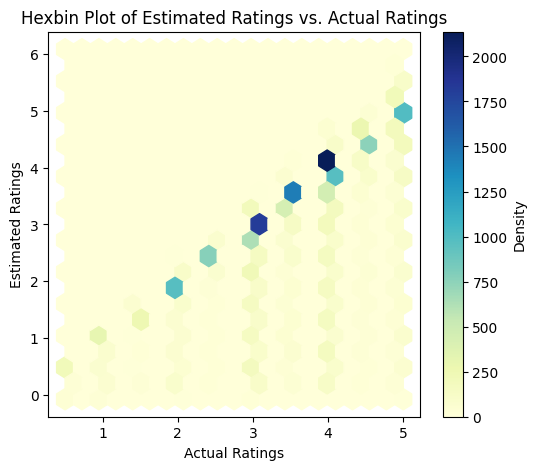

In [57]:

actual_ratings = deployment_aggregated['rating']
estimated_ratings = deployment_aggregated['estimated_rating']

# Create a scatter plot with transparency
plt.figure(figsize=(6, 5))
hb = plt.hexbin(actual_ratings, estimated_ratings, gridsize=20, cmap='YlGnBu')
plt.colorbar(hb, label='Density')
plt.xlabel("Actual Ratings")
plt.ylabel("Estimated Ratings")
plt.title("Hexbin Plot of Estimated Ratings vs. Actual Ratings")
plt.show()

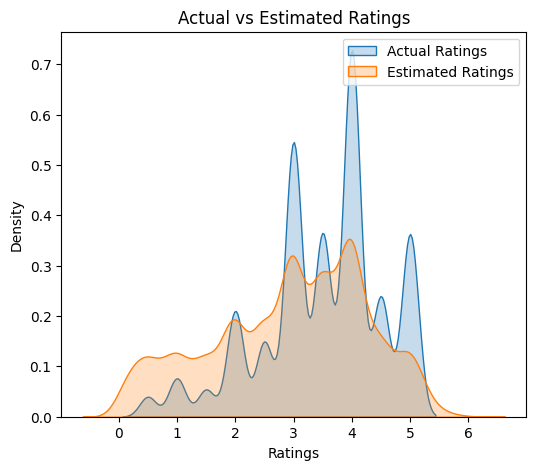

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with columns 'rating' and 'estimated_rating'

plt.figure(figsize=(6, 5))
sns.kdeplot(deployment_aggregated['rating'], label='Actual Ratings', shade=True)
sns.kdeplot(deployment_aggregated['estimated_rating'], label='Estimated Ratings', shade=True)
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.title("Actual vs Estimated Ratings")
plt.legend()
plt.show()


# **Conclusions**



Our quest to build an optimal recommendation model started with the Vanilla KNNBaseline baseline, yielding an initial RMSE of 0.88 Over five iterations, we explored KNNBasic, KNNWithMeans, and SVD models, fine-tuning each through grid search for better performance.

An innovative hybrid model combining content-based cosine similarity and collaborative SVD emerged as a highlight. The truncated SVD model stood out, achieving an impressive RMSE of **0.29**, showcasing its potential.

When applied to unseen data, our model achieved a reasonable RMSE of 1.16, with opportunities for further enhancement.

In summary, our iterative journey provided insights into recommendation systems, emphasizing the efficacy of hybrid SVD techniques for improved predictive accuracy across various datasets.

---

## **Recommendation**

1. Consider expanding hyperparameter search using RandomizedSearchCV followed by fine-tuning with GridSearchCV for improved model performance.
2. Evaluate the model using a variety of metrics like precision, recall, MAP, and NCGD on a separate validation set to avoid overfitting.
3. Experiment with different weight combinations for content-based and collaborative predictions in the hybrid model to optimize recommendation accuracy.
4. Continuously monitor and retrain the deployed model with new data to ensure consistent predictive quality in real-world scenarios.
5. Enhance scalability by implementing distributed computing frameworks like Spark to handle large datasets more efficiently.
6. Create more comprehensive user and item profiles by incorporating features such as descriptions, demographics, and historical behavior.
7. Solve the cold start problem by employing strategies like content-based recommendations for new users or items.
8. Improve user trust and engagement by implementing mechanisms to provide explanations for the recommended items.

##**Way Forward**

- Enhance the recommendation system by implementing comprehensive model selection.
- Optimize the Hybrid model.
- Continuous monitoring and training of the model
